In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [10]:
train_df=pd.read_csv("train.csv")
train_df.head(10)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
5,6,C9,1785,Rented,Individual,52,52,No,X2,5.0,1.0,22,15264.0,1
6,7,C3,679,Owned,Individual,28,28,No,NaN,NaN,NaN,17,10640.0,0
7,8,C1,3175,Owned,Joint,75,73,Yes,X4,9.0,4.0,17,29344.0,1
8,9,C15,3497,Owned,Joint,52,43,No,X1,14.0,3.0,1,27283.2,0
9,10,C1,530,Owned,Joint,59,26,Yes,NaN,7.0,4.0,18,21100.8,1


In [11]:
test_df=pd.read_csv("test.csv")
test_df.head(10)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0
5,50888,C1,1329,Rented,Individual,24,24,No,X2,NaN,NaN,18,6150.0
6,50889,C2,3479,Owned,Individual,56,56,No,X5,14+,4.0,17,19152.0
7,50890,C13,396,Rented,Individual,41,41,No,NaN,NaN,NaN,16,11034.0
8,50891,C18,513,Owned,Individual,22,22,No,X3,NaN,NaN,22,10784.0
9,50892,C3,957,Owned,Joint,41,37,Yes,X5,6.0,1.0,22,16934.4


In [12]:
train_df.isnull().sum()/train_df.shape[0] *100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           22.976691
Holding_Policy_Duration    39.799929
Holding_Policy_Type        39.799929
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
Response                    0.000000
dtype: float64

In [13]:
test_df.isnull().sum()/test_df.shape[0] *100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           23.054345
Holding_Policy_Duration    39.454254
Holding_Policy_Type        39.454254
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
dtype: float64

In [14]:
train_df['Health Indicator'].value_counts()

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

In [15]:
train_df['Holding_Policy_Duration'].value_counts()

1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64

In [16]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder
from lightgbm import LGBMClassifier,LGBMRegressor

def mice_imputation_numeric(train_numeric):
    """
    Impute numeric data using MICE imputation with Gradient Boosting Regressor.
    (we can use any other regressors to impute the data)
    """
    iter_imp_numeric = IterativeImputer(LGBMRegressor())
    imputed_train = iter_imp_numeric.fit_transform(train_numeric)
    train_numeric_imp = pd.DataFrame(imputed_train, columns = train_numeric.columns, index= train_numeric.index)
    return train_numeric_imp

def mice_imputation_categoric(train_categoric):
    """
    Impute categoric data using MICE imputation with Gradient Boosting Classifier.
    Steps:
    1. Ordinal Encode the non-null values
    2. Use MICE imputation with Gradient Boosting Classifier to impute the ordinal encoded data
    (we can use any other classifier to impute the data)
    3. Inverse transform the ordinal encoded data.
    """
    ordinal_dict={}
    for col in train_categoric:
        '''Ordinal encode train data'''
        ordinal_dict[col] = OrdinalEncoder()
        nn_vals = np.array(train_categoric[col][train_categoric[col].notnull()]).reshape(-1,1)
        nn_vals_arr = np.array(ordinal_dict[col].fit_transform(nn_vals)).reshape(-1,)
        train_categoric[col].loc[train_categoric[col].notnull()] = nn_vals_arr

    '''Impute the data using MICE with LightGBM '''
    iter_imp_categoric = IterativeImputer(LGBMClassifier(), max_iter =5, initial_strategy='most_frequent')
    imputed_train = iter_imp_categoric.fit_transform(train_categoric)
    train_categoric_imp = pd.DataFrame(imputed_train, columns =train_categoric.columns,index = train_categoric.index).astype(int)
    
    '''Inverse Transform'''
    for col in train_categoric_imp.columns:
        oe = ordinal_dict[col]
        train_arr= np.array(train_categoric_imp[col]).reshape(-1,1)
        train_categoric_imp[col] = oe.inverse_transform(train_arr)
        
    return train_categoric_imp


In [17]:
numeric_cols = train_df.select_dtypes(['float64','int64']).columns
categoric_cols = train_df.select_dtypes('object').columns

In [18]:
train_int=train_df[numeric_cols]
train_cat=train_df[categoric_cols]
train_numeric_imp  = mice_imputation_numeric(train_int)
train_categoric_imp = mice_imputation_categoric(train_cat)

In [19]:
train_df1=pd.concat([train_numeric_imp, train_categoric_imp], axis = 1)

In [20]:
train_df1.isnull().sum()/train_df1.shape[0] *100

ID                         0.0
Region_Code                0.0
Upper_Age                  0.0
Lower_Age                  0.0
Holding_Policy_Type        0.0
Reco_Policy_Cat            0.0
Reco_Policy_Premium        0.0
Response                   0.0
City_Code                  0.0
Accomodation_Type          0.0
Reco_Insurance_Type        0.0
Is_Spouse                  0.0
Health Indicator           0.0
Holding_Policy_Duration    0.0
dtype: float64

In [21]:
numeric_cols = test_df.select_dtypes(['float64','int64']).columns
categoric_cols = test_df.select_dtypes('object').columns
test_int=test_df[numeric_cols]
test_cat=test_df[categoric_cols]
test_numeric_imp  = mice_imputation_numeric(test_int)
test_categoric_imp = mice_imputation_categoric(test_cat)
test_df1=pd.concat([test_numeric_imp, test_categoric_imp], axis = 1)

In [22]:
test_df1.isnull().sum()/test_df1.shape[0] *100

ID                         0.0
Region_Code                0.0
Upper_Age                  0.0
Lower_Age                  0.0
Holding_Policy_Type        0.0
Reco_Policy_Cat            0.0
Reco_Policy_Premium        0.0
City_Code                  0.0
Accomodation_Type          0.0
Reco_Insurance_Type        0.0
Is_Spouse                  0.0
Health Indicator           0.0
Holding_Policy_Duration    0.0
dtype: float64

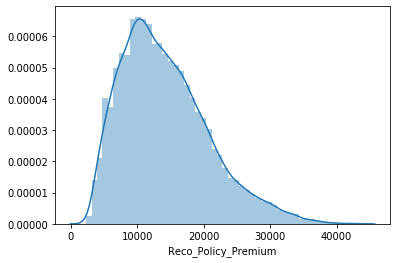

In [23]:
sns.distplot(train_df1['Reco_Policy_Premium'])

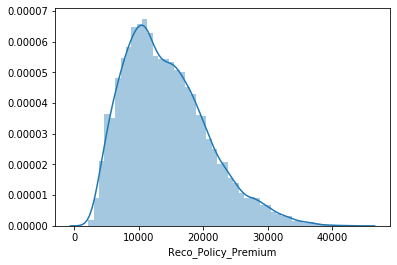

In [24]:
sns.distplot(test_df1['Reco_Policy_Premium'])

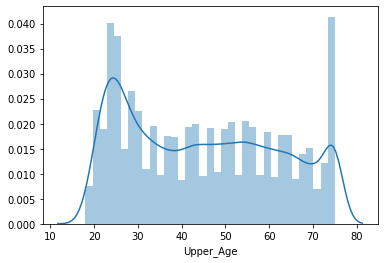

In [25]:
sns.distplot(train_df1['Upper_Age'])

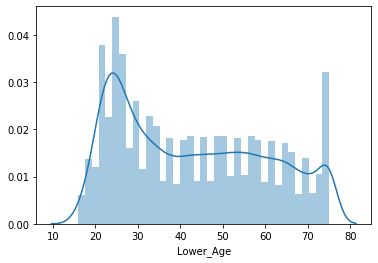

In [26]:
sns.distplot(train_df1['Lower_Age'])

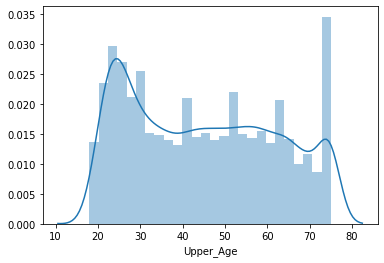

In [27]:
sns.distplot(test_df1['Upper_Age'])

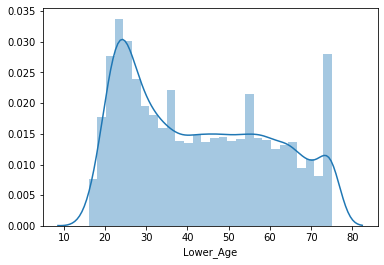

In [28]:
sns.distplot(test_df1['Lower_Age'])

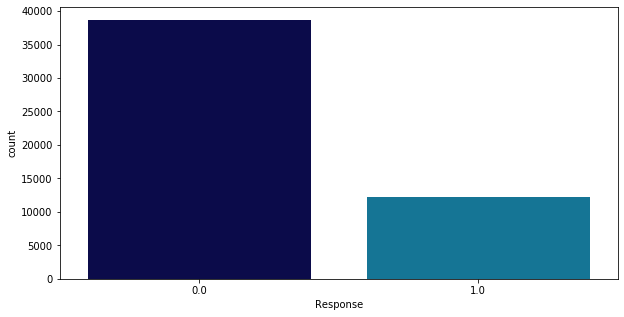

In [29]:
plt.figure(figsize=(10,5))
sns.countplot('Response',data=train_df1,palette='ocean')

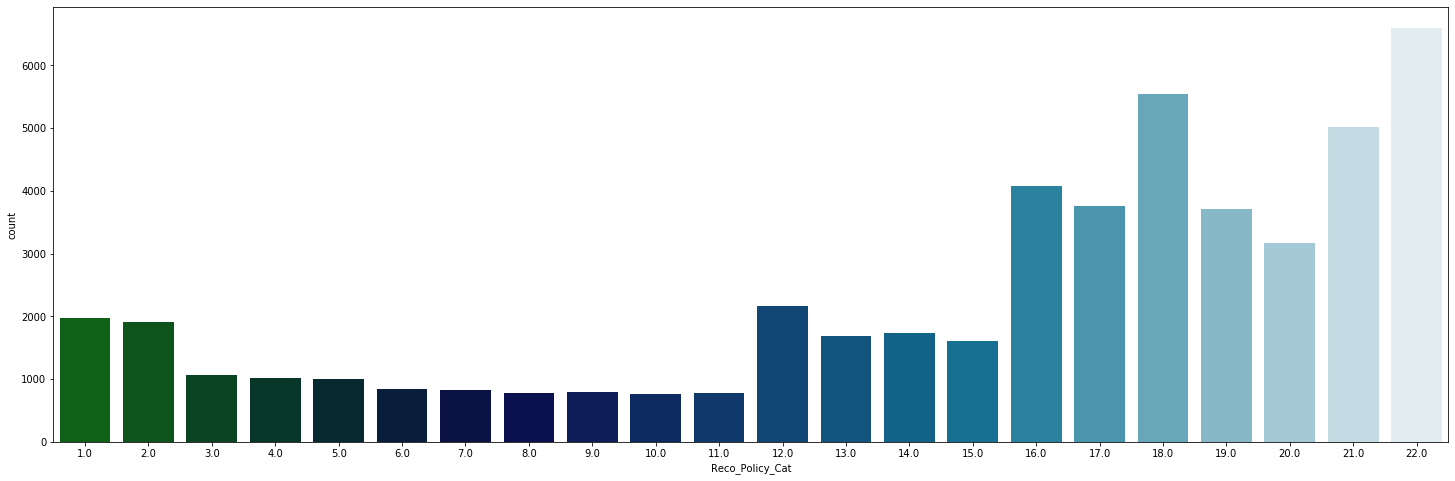

In [30]:
plt.figure(figsize=(25,8))
sns.countplot('Reco_Policy_Cat',data=train_df1,palette='ocean')

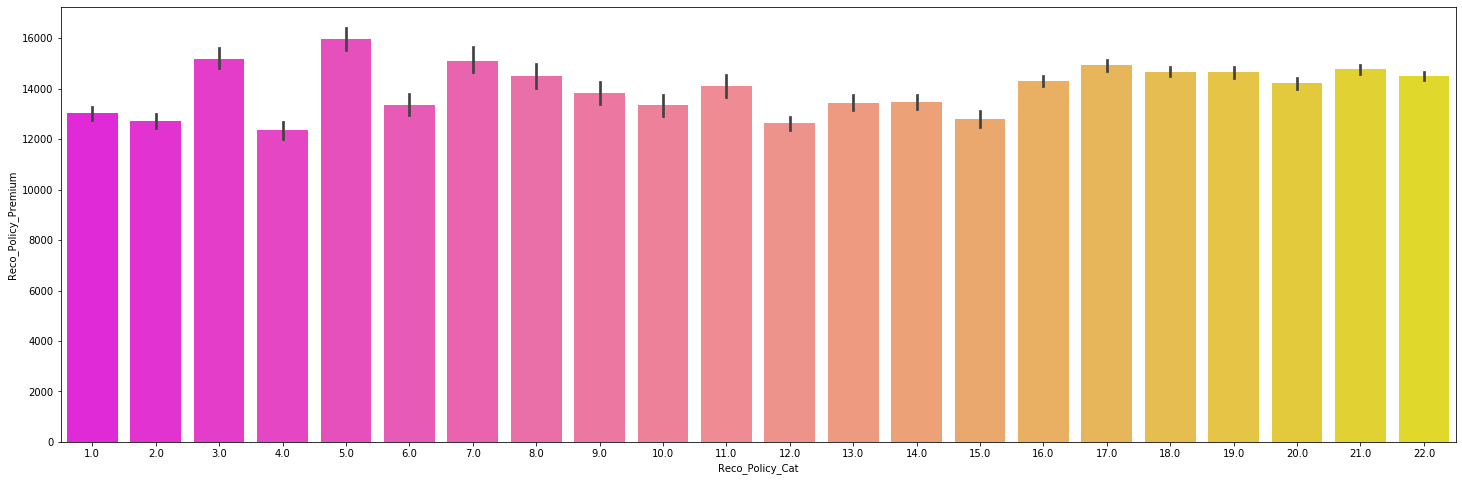

In [31]:
plt.figure(figsize=(25,8))
sns.barplot(x='Reco_Policy_Cat',y='Reco_Policy_Premium',data=train_df1,palette='spring')

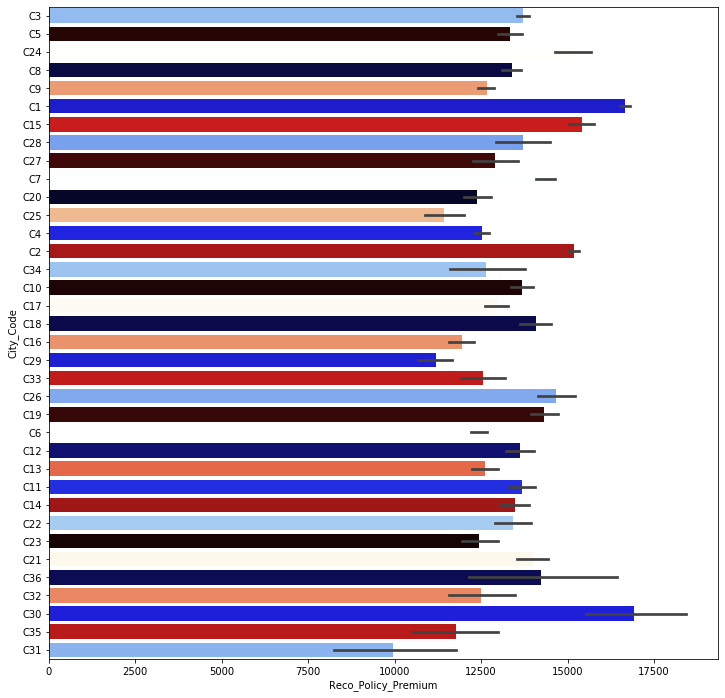

In [32]:
plt.figure(figsize=(12,12))
sns.barplot(y='City_Code',x='Reco_Policy_Premium',data=train_df1,palette='flag')

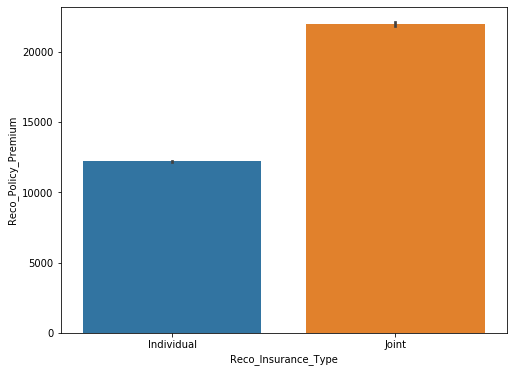

In [33]:
plt.figure(figsize=(8,6))
sns.barplot(y='Reco_Policy_Premium',x='Reco_Insurance_Type',data=train_df1)

In [34]:
train_df1['Age']=(train_df1.Upper_Age + train_df1.Lower_Age)/2
test_df1['Age']=(test_df1.Upper_Age + test_df1.Lower_Age)/2

In [35]:
train_df1['Reco_Policy_Region'] = train_df1['Reco_Policy_Cat'].astype(str)+'_'+train_df1['Region_Code'].astype(str)
test_df1['Reco_Policy_Region'] = test_df1['Reco_Policy_Cat'].astype(str)+'_'+test_df1['Region_Code'].astype(str)
train_df1['Policy_Region'] = train_df1['Holding_Policy_Type'].astype(str)+'_'+train_df1['Region_Code'].astype(str)
test_df1['Policy_Region'] = test_df1['Holding_Policy_Type'].astype(str)+'_'+test_df1['Region_Code'].astype(str)
train_df1['policy_per_Age'] = train_df1['Holding_Policy_Type'].astype(str)+'_'+train_df1['Age'].astype(str)
test_df1['policy_per_Age'] = test_df1['Holding_Policy_Type'].astype(str)+'_'+test_df1['Age'].astype(str)
train_df1['Holding_policy_per_duration'] = train_df1['Holding_Policy_Type'].astype(str)+'_'+train_df1['Holding_Policy_Duration'].astype(str)
test_df1['Holding_policy_per_duration'] = test_df1['Holding_Policy_Type'].astype(str)+'_'+test_df1['Holding_Policy_Duration'].astype(str)
train_df1.drop(['Upper_Age','Lower_Age'],axis=1,inplace=True)
test_df1.drop(['Upper_Age','Lower_Age'],axis=1,inplace=True)

In [36]:
def ext(data):
    if data=='14+':
        j='14'
    else:
        j=data
    return j

train_df1['Holding_Policy_Duration']=train_df1['Holding_Policy_Duration'].apply(lambda j:ext(j))
test_df1['Holding_Policy_Duration']=test_df1['Holding_Policy_Duration'].apply(lambda j:ext(j))

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat_col_mask=['City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Reco_Policy_Region','Policy_Region',
             'policy_per_Age','Holding_policy_per_duration']
for col in cat_col_mask:
    le.fit(train_df1[col].unique().tolist() + test_df1[col].unique().tolist())
    train_df1[col]=le.transform(train_df1[col])
    test_df1[col]=le.transform(test_df1[col])

In [38]:
### Feature Engineering
from sklearn.preprocessing import KBinsDiscretizer
def features(df):
    df['Health Indicator']=df['Health Indicator'].str.split('X').str[1]
    df['Health Indicator']=df['Health Indicator'].astype(int)
    df['Holding_Policy_Duration']=df['Holding_Policy_Duration'].astype(float)
    premium_discretizer = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='quantile')
    df['Reco_Policy_Premium']=premium_discretizer.fit_transform(df['Reco_Policy_Premium'].values.reshape(-1,1)).astype(int)
    age_discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
    df['Age']=age_discretizer.fit_transform(df['Age'].values.reshape(-1,1)).astype(int)
    df['Avg_Region_Age'] = df.groupby(['Region_Code'])['Age'].transform('mean')
    df['Avg_Region_Premium'] = df.groupby(['Region_Code'])['Reco_Policy_Premium'].transform('mean')
    df['Nunq_Insurance_Type_Per_Region'] = df.groupby('Region_Code')['Reco_Insurance_Type'].transform('nunique')
    df['Nunq_Accomodation_Type_Per_Region'] = df.groupby('Region_Code')['Accomodation_Type'].transform('nunique')
    df['Nunq_Premium_Region'] = df.groupby(['Reco_Policy_Premium'])['Region_Code'].transform('nunique')
    df['Nunq_Policy_cat_Region'] = df.groupby(['Region_Code'])['Reco_Policy_Cat'].transform('nunique')
    df['Avg_premium_per_insurace type'] = df.groupby(['Reco_Policy_Cat'])['Reco_Policy_Premium'].transform('mean')
    df['Avg_premium_per_holding_policy'] = df.groupby(['Holding_Policy_Type'])['Reco_Policy_Premium'].transform('mean')
    df['Avg_premium_per_Health_indicator'] = df.groupby(['Health Indicator'])['Reco_Policy_Premium'].transform('mean')
    df['Avg_age_per_policy_type'] = df.groupby(['Reco_Policy_Cat'])['Age'].transform('mean')
    df['Nunq_policy_Type_Per_Health'] = df.groupby('Reco_Policy_Cat')['Health Indicator'].transform('nunique')
    df['Avg_premium_per_age_group']= df.groupby(['Age'])['Reco_Policy_Premium'].transform('mean')
    #df.drop(['Age'],axis=1,inplace=True)
    return df

In [39]:
train_df2=features(train_df1)
test_df2=features(test_df1)

In [40]:
x=train_df2.drop(['ID','Response'],axis=1)

In [41]:
y=train_df2['Response']

In [42]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 54,stratify=y, shuffle=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((40705, 27), (10177, 27), (40705,), (10177,))

In [43]:
import xgboost as xgb

In [46]:
seed = 112 # Random seed

def xgbc_cv(max_depth,learning_rate,n_estimators,reg_alpha,min_child_weight,colsample_bytree,gamma,eta):
    from sklearn.metrics import roc_auc_score
    import numpy as np
    
    estimator_function = xgb.XGBClassifier(max_depth=int(max_depth),
                                           learning_rate= learning_rate,
                                           n_estimators= int(n_estimators),
                                           reg_alpha = reg_alpha,
                                           colsample_bytree= colsample_bytree,
                                           gamma=gamma,
                                           min_child_weight= int(min_child_weight),
                                           eta=eta,
                                           objective='binary:logistic',
                                           nthread = -1,
                                           seed = seed)
    # Fit the estimator
    estimator_function.fit(x_train,y_train)
    
    # calculate out-of-the-box roc_score using validation set 1
    probs = estimator_function.predict_proba(x_test)
    probs = probs[:,1]
    val1_roc = roc_auc_score(y_test,probs)

    return np.array([val1_roc]).mean()

In [47]:
from bayes_opt import BayesianOptimization

# alpha is a parameter for the gaussian process
# Note that this is itself a hyperparemter that can be optimized.
gp_params = {"alpha": 1e-10}

# We create the BayesianOptimization objects using the functions that utilize
# the respective classifiers and return cross-validated scores to be optimized.

seed = 112 # Random seed

# We create the bayes_opt object and pass the function to be maximized
# together with the parameters names and their bounds.
# Note the syntax of bayes_opt package: bounds of hyperparameters are passed as two-tuples

hyperparameter_space = {
    'max_depth': (2,20),
    'learning_rate': (0,1),
    'n_estimators' : (10,2000),
    'reg_alpha': (0,1),
    'min_child_weight': (1, 20),
    'colsample_bytree': (0.1, 1),
    'gamma' : (0,10),
    'eta' : (0,1)
}

xgbcBO = BayesianOptimization(f = xgbc_cv, 
                             pbounds =  hyperparameter_space,
                             random_state = seed,
                             verbose = 10)

# Finally we call .maximize method of the optimizer with the appropriate arguments
# kappa is a measure of 'aggressiveness' of the bayesian optimization process
# The algorithm will randomly choose 3 points to establish a 'prior', then will perform 
# 10 interations to maximize the value of estimator function
xgbcBO.maximize(init_points=50,n_iter=50,acq='ucb', kappa= 3, **gp_params)

|   iter    |  target   | colsam... |    eta    |   gamma   | learni... | max_depth | min_ch... | n_esti... | reg_alpha |
-------------------------------------------------------------------------------------------------------------------------
|  1        |  0.7734   |  0.4376   |  0.6403   |  9.5      |  0.07568  |  15.98    |  16.82    |  119.1    |  0.8177   |
|  2        |  0.739    |  0.8968   |  0.7223   |  0.02556  |  0.9812   |  8.182    |  2.8      |  795.3    |  0.004945 |
|  3        |  0.7748   |  0.763    |  0.9558   |  8.206    |  0.345    |  8.814    |  15.91    |  181.6    |  0.5461   |
|  4        |  0.7552   |  0.246    |  0.2901   |  0.4501   |  0.3322   |  15.26    |  16.95    |  1.422e+0 |  0.1884   |
|  5        |  0.7451   |  0.9871   |  0.388    |  5.032    |  0.7635   |  14.31    |  14.72    |  436.2    |  0.7631   |
|  6        |  0.7754   |  0.1677   |  0.6109   |  4.256    |  0.2344   |  11.88    |  11.96    |  1.101e+0 |  0.1549   |
|  7        |  0.7476   

|  41       |  0.744    |  0.7096   |  0.3527   |  4.185    |  0.2613   |  3.626    |  10.79    |  811.2    |  0.8358   |
|  42       |  0.7547   |  0.2863   |  0.7065   |  2.828    |  0.5241   |  18.25    |  16.43    |  626.1    |  0.05493  |
|  43       |  0.7839   |  0.5642   |  0.3834   |  8.611    |  0.02359  |  16.96    |  7.377    |  1.36e+03 |  0.3763   |
|  44       |  0.7337   |  0.1613   |  0.7397   |  0.6594   |  0.9973   |  16.61    |  8.744    |  1.277e+0 |  0.5473   |
|  45       |  0.7583   |  0.3203   |  0.05994  |  3.771    |  0.5949   |  11.64    |  12.47    |  753.0    |  0.8456   |
|  46       |  0.7538   |  0.1563   |  0.2626   |  1.517    |  0.5289   |  14.99    |  9.945    |  644.8    |  0.3547   |
|  47       |  0.7838   |  0.4903   |  0.434    |  9.084    |  0.1203   |  17.92    |  13.5     |  1.847e+0 |  0.8328   |
|  48       |  0.7742   |  0.5986   |  0.2958   |  9.05     |  0.5028   |  10.8     |  10.9     |  1.718e+0 |  0.3343   |
|  49       |  0.7378   

|  82       |  0.7586   |  0.5451   |  0.2317   |  1.045    |  0.3038   |  12.69    |  18.14    |  549.6    |  0.4598   |
|  83       |  0.7668   |  0.4088   |  0.1758   |  1.014    |  0.3236   |  19.97    |  2.104    |  875.3    |  0.3756   |
|  84       |  0.7658   |  0.5578   |  0.1863   |  8.296    |  0.6081   |  13.64    |  5.693    |  1.921e+0 |  0.8694   |
|  85       |  0.738    |  0.8596   |  0.5877   |  3.415    |  0.8418   |  13.41    |  17.98    |  1.621e+0 |  0.1848   |
|  86       |  0.7492   |  0.3756   |  0.311    |  0.8898   |  0.6334   |  3.974    |  18.85    |  845.3    |  0.6384   |
|  87       |  0.7813   |  0.4679   |  0.4322   |  9.96     |  0.04797  |  14.93    |  15.07    |  1.974e+0 |  0.01807  |
|  88       |  0.7615   |  0.7543   |  0.3733   |  2.727    |  0.4086   |  11.86    |  5.507    |  245.5    |  0.3052   |
|  89       |  0.7639   |  0.7637   |  0.4178   |  5.821    |  0.5778   |  6.884    |  17.4     |  1.381e+0 |  0.8314   |
|  90       |  0.755    

In [48]:
xgbcBO.max

{'target': 0.7839440898264427,
 'params': {'colsample_bytree': 0.5642096076799697,
  'eta': 0.3834387945091807,
  'gamma': 8.610852734270589,
  'learning_rate': 0.02358712994362988,
  'max_depth': 16.95907860596403,
  'min_child_weight': 7.376622284435268,
  'n_estimators': 1359.7156751530044,
  'reg_alpha': 0.37634400511307364}}

In [49]:
finalmod = xgb.XGBClassifier(max_depth=17,
                             learning_rate= 0.0028164203318438163,
                             n_estimators= 1359,
                             reg_alpha = 0.37634400511307364,
                             colsample_bytree= 0.5642096076799697,
                             gamma=8.610852734270589,
                             min_child_weight= 7,
                             eta=0.3834387945091807,
                             objective='binary:logistic',
                             nthread = -1,
                             seed = seed)
   # Fit the estimator
finalmod.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5642096076799697,
              eta=0.3834387945091807, gamma=8.610852734270589, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.0028164203318438163, max_delta_step=0,
              max_depth=17, min_child_weight=7, missing=nan,
              monotone_constraints='()', n_estimators=1359, n_jobs=-1,
              nthread=-1, num_parallel_tree=1, random_state=112,
              reg_alpha=0.37634400511307364, reg_lambda=1, scale_pos_weight=1,
              seed=112, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [50]:
def feature_importance(model, X_train):

    fI = model.feature_importances_
    
    print(fI)
    
    names = x_train.columns.values
    
    ticks = [i for i in range(len(names))]
    
    plt.bar(ticks, fI)
    
    plt.xticks(ticks, names,rotation = 90)
    
    plt.show()

[0.02720774 0.06690587 0.09588172 0.03046534 0.02553498 0.02712121
 0.02816663 0.02013546 0.01945785 0.02022439 0.03958564 0.04005047
 0.04830451 0.04262925 0.04030006 0.02225379 0.0223363  0.02123443
 0.0242486  0.03296133 0.03008867 0.05913854 0.04769183 0.02093462
 0.06791966 0.03873269 0.04048842]


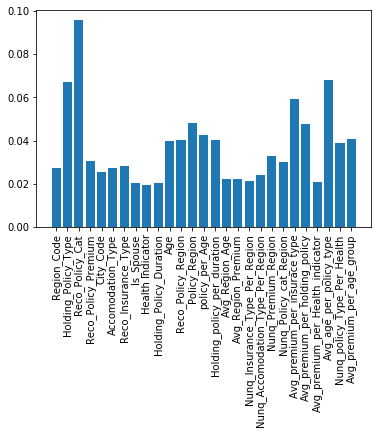

In [51]:
feature_importance(finalmod,x_train)

In [52]:
test_df2=test_df1.drop(['ID'],axis=1)
probs = finalmod.predict_proba(test_df2)
probs = probs[:,1]
test_df1['Response']=probs

In [54]:
df_out=test_df1[['ID','Response']]
df_out.to_csv('prediction10.csv',index=False)